In [1]:
import pickle
import numpy as np

In [2]:
path_to_attention_pkl = '/data/exp/abhagat/attention_vis/'
pkl_file = 'exp_results.pkl'
with open(path_to_attention_pkl + pkl_file, 'rb') as f:
    data = pickle.load(f)

In [3]:
# t_data=data['3929202aaadd438bae75142413431837']
# a2a = t_data['actor_to_actor_attentions']
# ego_index = int(a2a[0][0][-1])
# a2ego = a2a[ego_index]
# normalized_attention = a2ego[1]
# attention = a2ego[2]

#print(t_data['actor_to_actor_attentions'][0])

In [4]:
# take data from a single token or iterate over tokens
tokens = [k for k in data.keys()]
# loop over all tokens here 
#data_token = data[tokens[0]]

actor_positions_list = []
actor_to_ego_attention_list = []
actor_to_ego_attention_norm_list = []
for token in tokens:
    data_token = data[token]
    actor_positions = data_token['est_box_actor_positions']
    #print(actor_positions)
    actor_to_actor_attention = data_token['actor_to_actor_attentions']
    ego_index = int(actor_to_actor_attention[0][0][-1])

    #Here let us pretend that the actor with index 0 is the ego
    actor_to_ego_attention_tuple = actor_to_actor_attention[ego_index]
    actor_to_ego_attention = actor_to_ego_attention_tuple[1]
    actor_to_ego_attention_norm = actor_to_ego_attention_tuple[2]
    
    actor_positions_list.append(actor_positions[:-1])
    actor_to_ego_attention_list.append(actor_to_ego_attention[:-1])
    actor_to_ego_attention_norm_list.append(actor_to_ego_attention_norm[:-1])

In [5]:
# CONFIGURATION
canvas_half_size = np.array((80,80)) #m
xy_res = (4,4) #m
pixel_size = (canvas_half_size * 2 /xy_res).astype(int)
# END CONFIGURATION

In [6]:
def metric_to_pixel(actor_center):
    xypix = np.floor((actor_center + canvas_half_size)/xy_res)
    return xypix
# canvas is centered on the ego vehicle 
#print(metric_to_pixel(actor_positions))


In [7]:
def scatter_attention_to_heatmap(actor_positions, actor_to_ego_attention):
    heatmap = np.zeros(pixel_size)
    actor_center_pixels = metric_to_pixel(actor_positions)
    for i in range(len(actor_center_pixels)):
        pixel = actor_center_pixels[i].astype(int)
        heatmap[pixel[0],pixel[1]] = actor_to_ego_attention[i]
    return heatmap 


In [8]:
heatmaps = []
for i in range(len(actor_positions_list)):
    actor_positions = actor_positions_list[i]
    actor_to_ego_attention = actor_to_ego_attention_list[i]
    actor_to_ego_attention_norm = actor_to_ego_attention_norm_list[i]
    heatmap = scatter_attention_to_heatmap(actor_positions, actor_to_ego_attention_norm)
    heatmaps.append(heatmap)

In [9]:
heatmap_sum = np.zeros(heatmap.shape)
import copy as cp
for heatmap in heatmaps:
    heatmap_cp = cp.deepcopy(heatmap)
#     heatmap_cp[heatmap_cp<10e-15]=10e-15
#     heatmap_cp = np.log(heatmap_cp)
    heatmap_sum += heatmap_cp
    
heatmap_sum = heatmap_sum/len(heatmaps)
print(len(heatmaps))
heatmap_sum = np.rot90(heatmap_sum, 2)

197


[20. 20.]


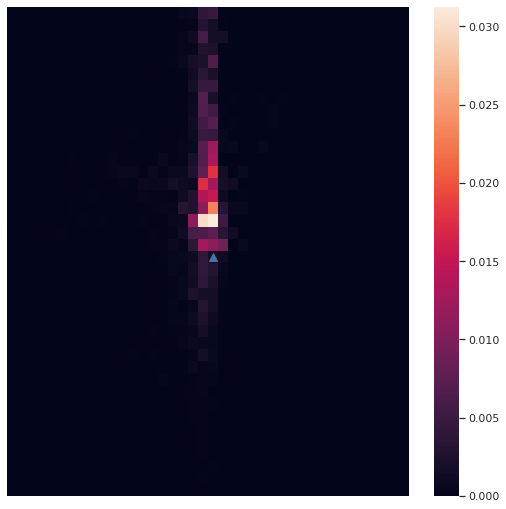

In [18]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0);import seaborn as sns; sns.set_theme();
fig = plt.figure(figsize=(9, 9))
ax = sns.heatmap(heatmap_sum,xticklabels=False,yticklabels=False)
origin = metric_to_pixel((0,0))
print(origin)
plt.plot(origin[0]+0.5,origin[1]+0.5,marker='^', markersize=8, linestyle='None')
fig.savefig('./cumulative_rb.pdf'.format(token))

[20. 20.]


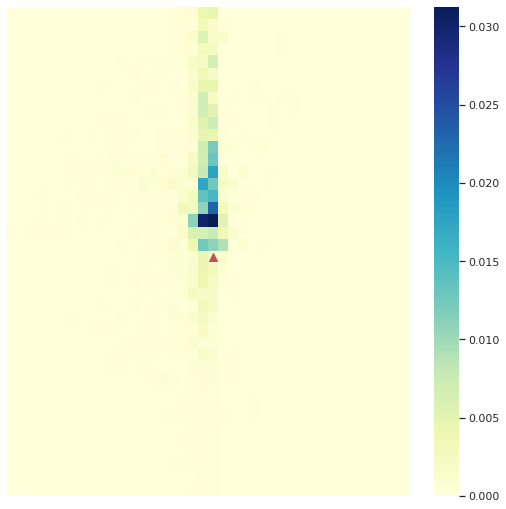

In [17]:
fig = plt.figure(figsize=(9, 9))
#plt.axis('equal')
origin = metric_to_pixel((0,0))
ax = sns.heatmap(heatmap_sum, cmap="YlGnBu",yticklabels=False,xticklabels=False)
print(origin)
plt.plot(origin[0]+0.5,origin[1]+0.5,marker='^',color='r',markersize=8, linestyle='None')
fig.savefig('./cumulative_cy.pdf')


3929202aaadd438bae75142413431837
fad6e65e4a4347c285309fd4b6443905
63dd055c427b48e9976b34a0fe004a54
126b1116480b43edb92fc29ab11f54a5
da3c6bb1b4af49e6b67ea9abd3c8c974
85fced893bd240a9a639a05178a82b47
a2b54c2ed66c49658ce597c2e5f4ac58
d6f794f33c8e4c6bb60d4c4807b743a7
52ab22e775c84af8915499579b7d3e1e
30c878843a0d4849895cd9c34f8933bb


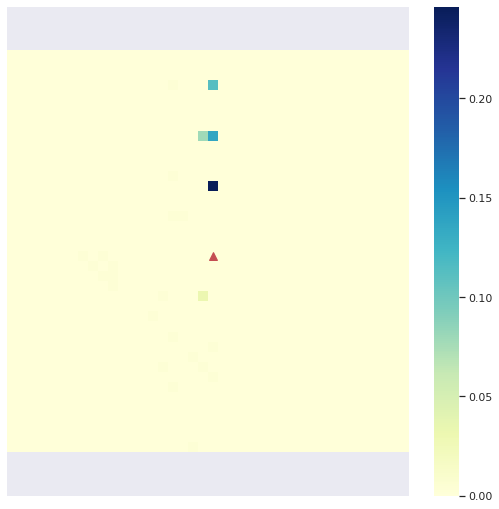

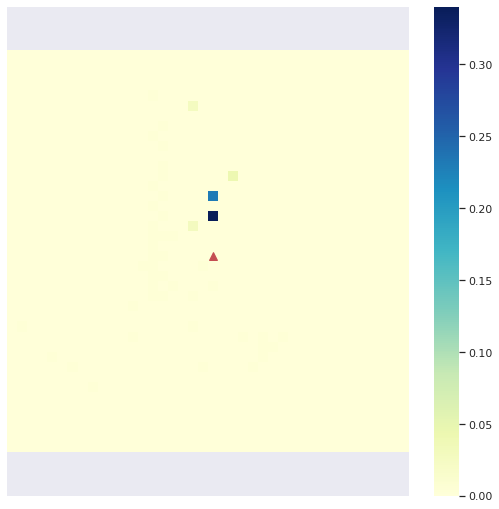

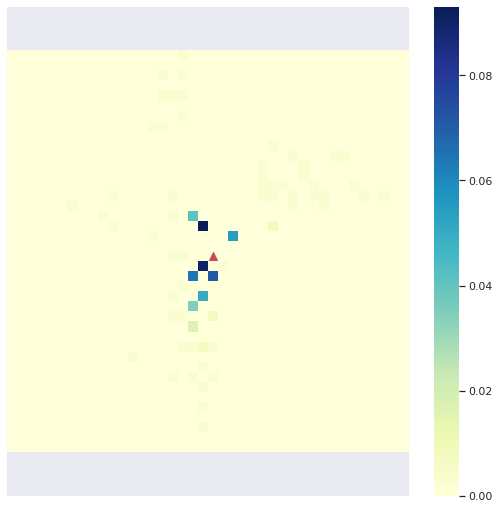

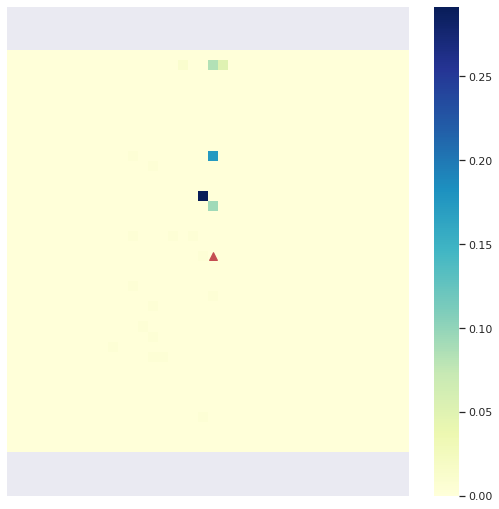

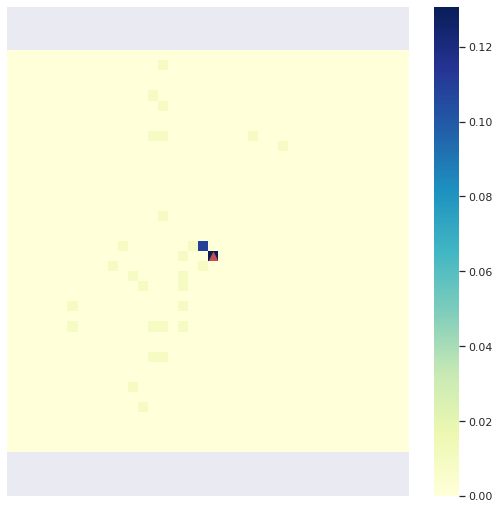

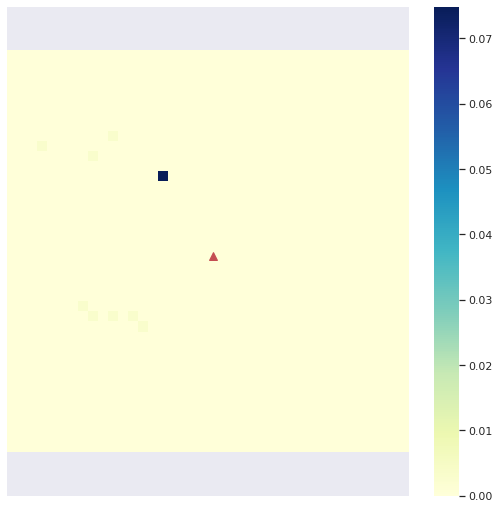

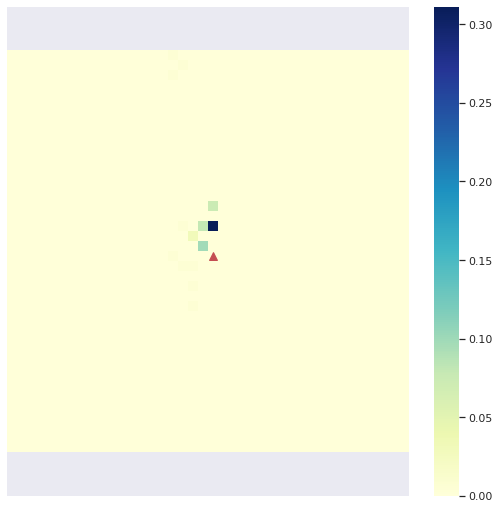

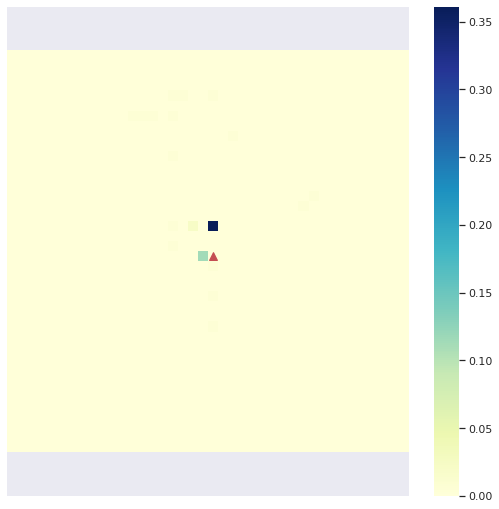

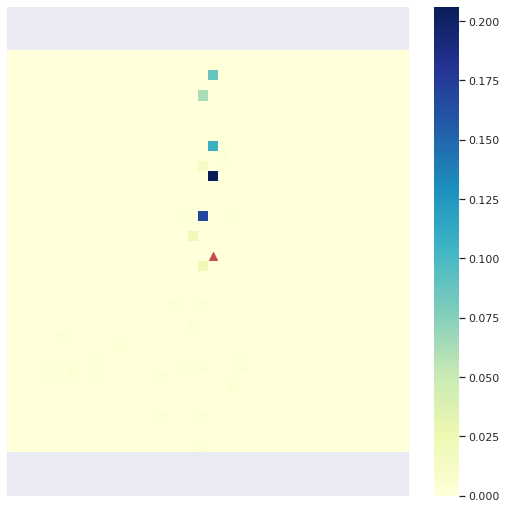

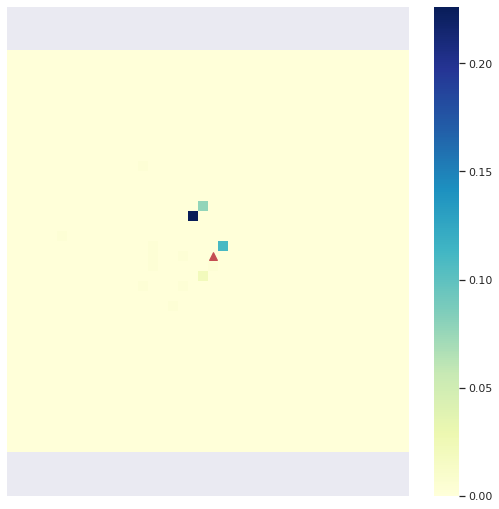

In [12]:
import numpy as np; np.random.seed(0);import seaborn as sns; sns.set_theme();
import matplotlib.pyplot as plt
for token,heatmap in zip(tokens[:10],heatmaps[:10]):
    fig = plt.figure(figsize=(9, 9))
    plt.axis('equal')
    print(token)
    #heatmap[heatmap<10e-15]=10e-15
    #heatmap=np.log(heatmap)
    heatmap = np.flip(np.flip(heatmap,1),0)
    ax = sns.heatmap(heatmap, cmap="YlGnBu",yticklabels=False,xticklabels=False)
    plt.plot(origin[0]+0.5,origin[1]+0.5,marker='^',color='r',markersize=8, linestyle='None')
    fig.savefig('./{}_cy.jpg'.format(token),dpi=100)

In [13]:
print(tokens[:10])






['3929202aaadd438bae75142413431837', 'fad6e65e4a4347c285309fd4b6443905', '63dd055c427b48e9976b34a0fe004a54', '126b1116480b43edb92fc29ab11f54a5', 'da3c6bb1b4af49e6b67ea9abd3c8c974', '85fced893bd240a9a639a05178a82b47', 'a2b54c2ed66c49658ce597c2e5f4ac58', 'd6f794f33c8e4c6bb60d4c4807b743a7', '52ab22e775c84af8915499579b7d3e1e', '30c878843a0d4849895cd9c34f8933bb']
